Linear Regression - Case Study

Note: Before you proceed with this case study, click here to download the necessary supporting files.

One of the organizations is looking to predict the car price based on the various features of the car.  Based on the features of the car, this company will decide the car price and quote to the customers who are looking to sell the car. In this business problem, you are looking to apply the linear regression technique to create the model and help company take care of the future customers.
 
Project Tasks
Pre-processing the data.
Missing Value Treatment 
Outlier Treatment if required 
Feature Scaling 
Encoding or any other technique to make categorial to Numerical data
Do extensive exploratory data analysis before creating the model.
Write the detailed conclusions from the analysis. 
Identify the variables you think are the most important ones.
Splitting the dataset into train and test sets (if required).
Apply the algorithm which you have learnt, i.e., Linear Regression.
Check if the assumptions of the linear regression are meeting or not.
Remove the unwanted feature from the model by seeing the P-Value. 
At the end, write the detailed analysis and the behavior you saw from the experiments. 
Finding the best performing model using the R Squared, Adjusted R Squared, F-Test, Mean Squared error (MSE), Root mean squared error (RMSE), Mean absolute error (MAE), and Mean absolute percentage error (MAPE) 
Data Dictionary of the dataset
Company - Car's company
Name - Name of the car model
Year - Make year of the car
Selling Price - Selling price of the car (Dependent variable)
Kilometer driven - Total kms driven by the car
Fuel - Cars fuel type
Seller Type - Type of the seller
Transmission - If the car is automatic or manual
Owner - Owner type of the car

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
dataset = pd.read_csv(r"/Users/mymac/Documents/Data Science Bootcamp/Week 15 - Linear Regression/Case Study - Car Price Prediction/Linear_Regression/Car_Details_Car_Dekho.csv")

In [9]:
dataset.head()

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
1,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
2,Honda,Honda City V MT,2018,930000,14500,Petrol,Dealer,Manual,First Owner
3,Honda,Honda City i DTEC V,2014,560000,74000,Diesel,Individual,Manual,Second Owner
4,Honda,Honda City i DTEC VX,2014,675000,90000,Diesel,Dealer,Manual,First Owner


# Understand the data

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        1720 non-null   object
 1   name           1720 non-null   object
 2   year           1720 non-null   int64 
 3   selling_price  1720 non-null   int64 
 4   km_driven      1720 non-null   int64 
 5   fuel           1720 non-null   object
 6   seller_type    1720 non-null   object
 7   transmission   1720 non-null   object
 8   owner          1720 non-null   object
dtypes: int64(3), object(6)
memory usage: 121.1+ KB


In [11]:
len(dataset)

1720

In [12]:
dataset.columns

Index(['Company', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [13]:
len(dataset.columns)

9

# Exploratory Data Analysis

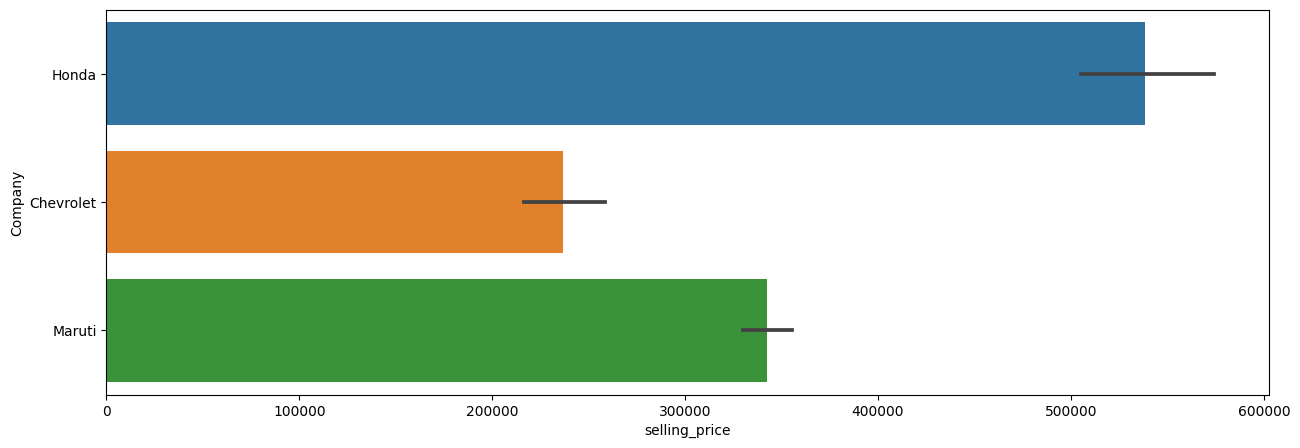

In [14]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, y='Company', x='selling_price')
plt.show()

Honda cars are having higher selling price

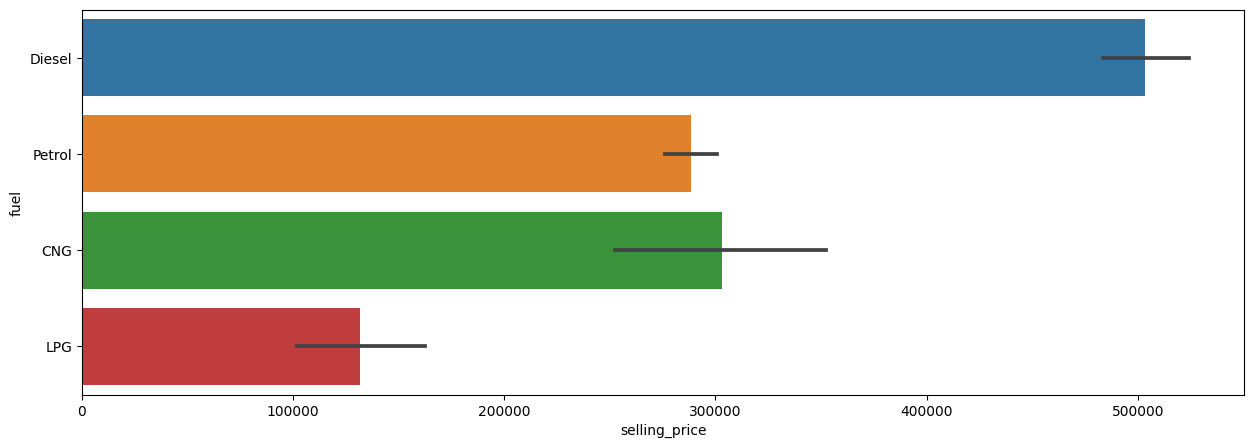

In [15]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, y='fuel', x='selling_price')
plt.show()

Diesel cars are having higher selling price

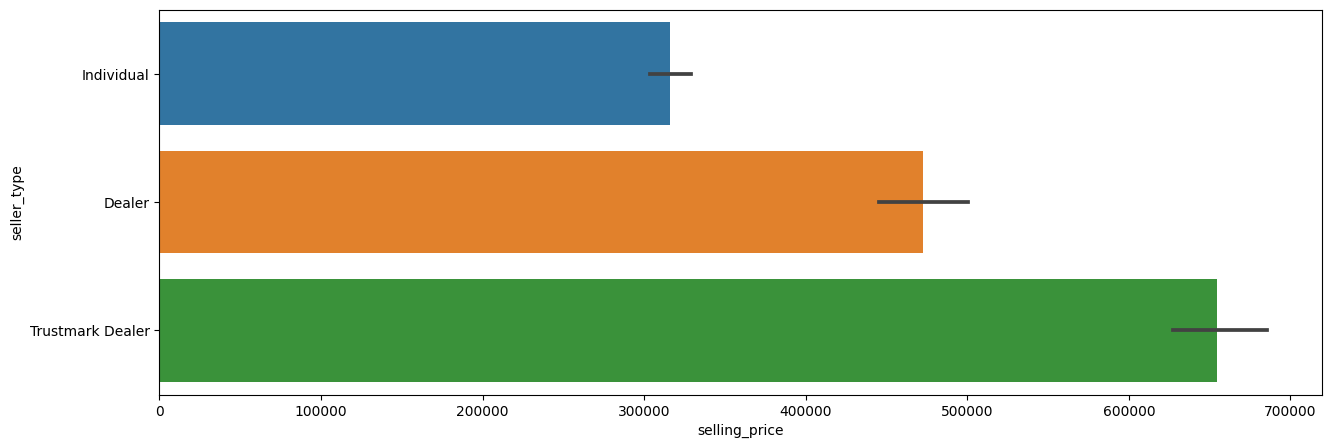

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, y='seller_type', x='selling_price')
plt.show()

Trustmark Dealers are having higher selling price

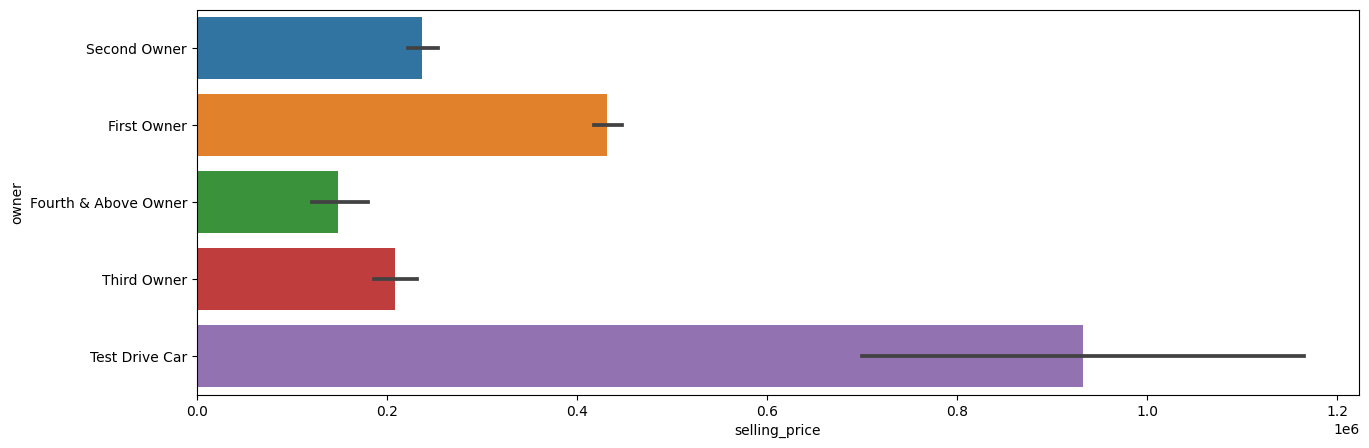

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, y='owner', x='selling_price')
plt.show()

Testdrive cars are having higher selling price

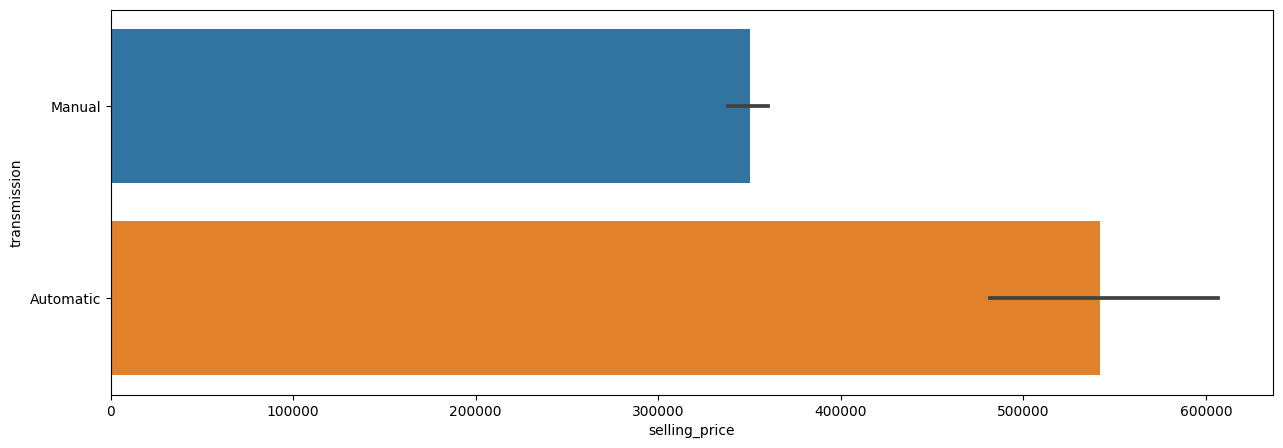

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, y='transmission', x='selling_price')
plt.show()

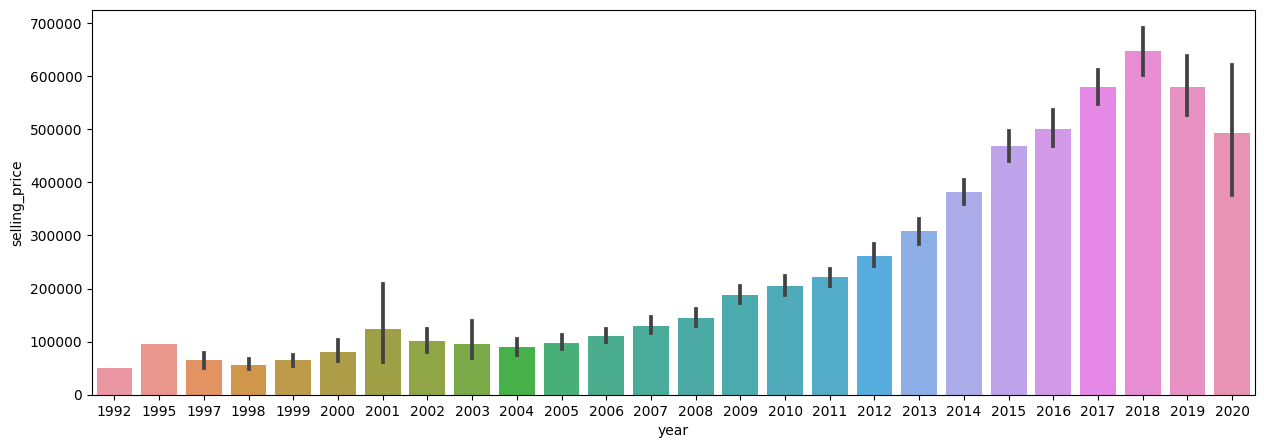

In [19]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, x='year', y='selling_price')
plt.show()

<Figure size 1500x500 with 0 Axes>

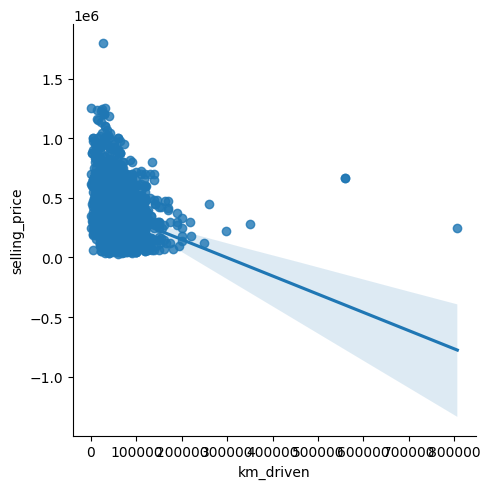

In [22]:
plt.figure(figsize=(15, 5))
sns.lmplot(data=dataset, x='km_driven', y='selling_price')
plt.show()

# Outlier Treatment

In [24]:
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR)) | (dataframe > (Q3 + 1.5*IQR))).any(axis=1)]
    return df_rem_out

dataset = outlier_treatment(dataset)

/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_11295/313850766.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataframe.quantile(0.25)
/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_11295/313850766.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataframe.quantile(0.75)
/var/folders/03/dbs2l00d4xz927ww7vh59lm00000gn/T/ipykernel_11295/313850766.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out = dataframe[~((datafr

In [25]:
len(dataset)

1632

# Missing Value Treatment

In [29]:
dataset.isnull().sum()/len(dataset)*100

Company          0.0
name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In this dataset there are no missing values, so we are good to proceed with the next step.

# Encoding

In [36]:
# Separating Numerical and Categorical Columns
def data_type(dataset):
    numerical = []
    categorical = []
    for i in datset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(dataset)

# Identify binary columns and ignore them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int','float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0,1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove binary columns from numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

In [37]:
dataset

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1,79,2014,450000,141000,1,1,1,2
1,1,79,2014,450000,141000,1,1,1,2
2,1,110,2018,930000,14500,3,0,1,0
3,1,117,2014,560000,74000,1,1,1,2
4,1,118,2014,675000,90000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1714,2,195,2006,75000,130000,3,1,1,0
1715,2,159,2014,195000,75000,3,1,1,2
1716,2,173,2015,155000,40000,3,1,1,0
1718,2,305,2012,225000,90000,1,1,1,2


# Split the data into Train and Test

In [41]:
y = dataset.iloc[:, 3].values
x = dataset.iloc[:, [0, 2, 4, 5, 6, 7, 8]].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Perform Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

#Fitting the model
regressor_ini = LinearRegression
regressor_ini.fit(x_train, y_train)

# Returning R^2 for the model
regressor_ini_R2 = regressor_ini.score(x_train, y_train)
print('R^2: {0}'.format(regressor_ini_R2))

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'